In [12]:
from sklearn.metrics import hamming_loss
import pandas as pd

In [13]:
# Load the original and modified datasets
original_data = pd.read_csv('./data/annotated/annotated_emails.csv')
predicted_data = pd.read_csv('./data/llm/llm_prediction.csv')

# Calculate the error rate using hamming_loss
error_rate = hamming_loss(original_data['label'], predicted_data['label'])

# Print the error rate
print(f"Error rate between LLM predictions and annotated emails: {error_rate:.2%}")

Error rate between LLM predictions and annotated emails: 2.76%


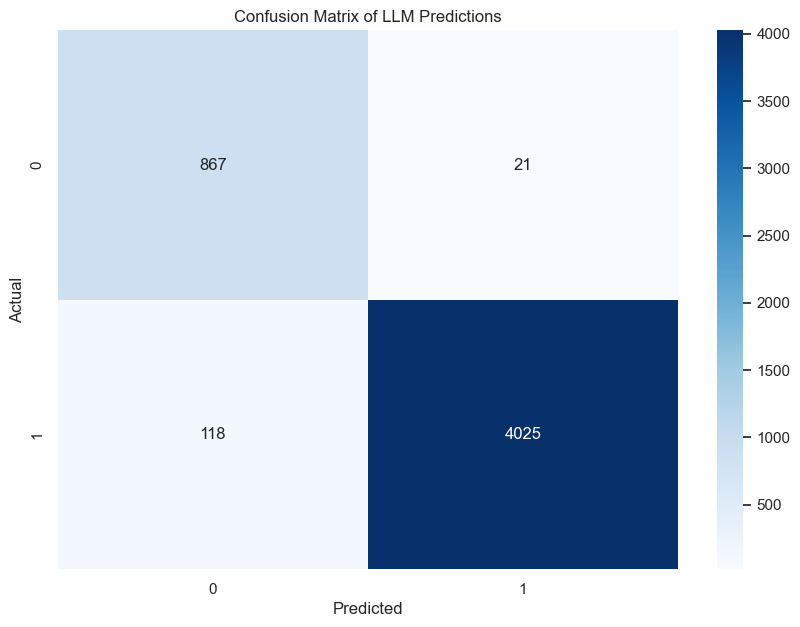

Accuracy of LLM predictions: 97.24%


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Data preparation for visualization
data = {
    'Actual Labels': original_data['label'],
    'Predicted Labels': predicted_data['label']
}
df = pd.DataFrame(data)

# Create a confusion matrix
confusion_matrix = pd.crosstab(df['Actual Labels'], df['Predicted Labels'], rownames=['Actual'], colnames=['Predicted'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of LLM Predictions')
plt.show()

# Calculate accuracy
accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1]) / df.shape[0]
print(f"Accuracy of LLM predictions: {accuracy:.2%}")


In [15]:
from sklearn.metrics import f1_score, classification_report

# Calculate F1 Score
f1 = f1_score(original_data['label'], predicted_data['label'], average='weighted')
print(f"F1 Score: {f1:.2f}")

# Generate classification report
class_report = classification_report(original_data['label'], predicted_data['label'])
print("Classification Report:")
print(class_report)


F1 Score: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       888
           1       0.99      0.97      0.98      4143

    accuracy                           0.97      5031
   macro avg       0.94      0.97      0.95      5031
weighted avg       0.97      0.97      0.97      5031

